# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
108084,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0269,0.0024,0.0024,9,0,1,1
80041,0.0708,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.1025,0.0024,0.0122,6,0,10,0
25284,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0317,0.0757,0.0024,0.0098,0,0,0,0
468278,0.4956,0.3125,0.0806,0.0586,0.0757,0.0269,0.9839,1.3818,0.1514,0.0342,7,7,23,23
369326,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0146,0.0684,0.1367,0.0073,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
from keras.models import Sequential    
model = Sequential()


model.add(Dense(48, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())


model.add(Dense(192, activation='softmax'))
model.add(BatchNormalization())

model.add(Dense(384, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(768, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(24, activation='softmax'))

model.add(Dense(768, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(384, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(192, activation='softmax'))
model.add(BatchNormalization())

model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())


model.add(Dense(48, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                528       
                                                                 
 batch_normalization (BatchN  (None, 48)               192       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 96)                4704      
                                                                 
 batch_normalization_1 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 192)               18624     
                                                                 
 batch_normalization_2 (Batc  (None, 192)              7

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 4s 20ms/step - loss: 1.6772 - accuracy: 0.5721 - val_loss: 2.9464 - val_accuracy: 0.5284
Epoch 2/300
75/75 [==============================] - 1s 17ms/step - loss: 1.1762 - accuracy: 0.6830 - val_loss: 2.7853 - val_accuracy: 0.5284
Epoch 3/300
75/75 [==============================] - 1s 17ms/step - loss: 0.8974 - accuracy: 0.7549 - val_loss: 2.6125 - val_accuracy: 0.5284
Epoch 4/300
75/75 [==============================] - 1s 17ms/step - loss: 0.7326 - accuracy: 0.7977 - val_loss: 2.4661 - val_accuracy: 0.5284
Epoch 5/300
75/75 [==============================] - 1s 17ms/step - loss: 0.6414 - accuracy: 0.8205 - val_loss: 2.3730 - val_accuracy: 0.5284
Epoch 6/300
75/75 [==============================] - 1s 17ms/step - loss: 0.5838 - accuracy: 0.8342 - val_loss: 2.3073 - val_accuracy: 0.5284
Epoch 7/300
75/75 [==============================] - 1s 16ms/step - loss: 0.5445 - accuracy: 0.8443 - val_loss: 2.2349 - val_accuracy: 0.5284
Epoch 

75/75 [==============================] - 1s 16ms/step - loss: 0.1977 - accuracy: 0.9433 - val_loss: 0.3110 - val_accuracy: 0.9174
Epoch 59/300
75/75 [==============================] - 1s 16ms/step - loss: 0.2002 - accuracy: 0.9426 - val_loss: 0.3048 - val_accuracy: 0.9192
Epoch 60/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1971 - accuracy: 0.9433 - val_loss: 0.3169 - val_accuracy: 0.9155
Epoch 61/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1927 - accuracy: 0.9448 - val_loss: 0.3043 - val_accuracy: 0.9197
Epoch 62/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1925 - accuracy: 0.9448 - val_loss: 0.3046 - val_accuracy: 0.9208
Epoch 63/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1879 - accuracy: 0.9464 - val_loss: 0.3056 - val_accuracy: 0.9205
Epoch 64/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1915 - accuracy: 0.9447 - val_loss: 0.3132 - val_accuracy: 0.9183
Epoch 65/300

75/75 [==============================] - 1s 16ms/step - loss: 0.1449 - accuracy: 0.9586 - val_loss: 0.2855 - val_accuracy: 0.9305
Epoch 116/300
75/75 [==============================] - 1s 17ms/step - loss: 0.1434 - accuracy: 0.9593 - val_loss: 0.2858 - val_accuracy: 0.9307
Epoch 117/300
75/75 [==============================] - 1s 17ms/step - loss: 0.1404 - accuracy: 0.9600 - val_loss: 0.2870 - val_accuracy: 0.9297
Epoch 118/300
75/75 [==============================] - 1s 17ms/step - loss: 0.1410 - accuracy: 0.9598 - val_loss: 0.2827 - val_accuracy: 0.9315
Epoch 119/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1395 - accuracy: 0.9604 - val_loss: 0.2792 - val_accuracy: 0.9330
Epoch 120/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1423 - accuracy: 0.9597 - val_loss: 0.2941 - val_accuracy: 0.9296
Epoch 121/300
75/75 [==============================] - 1s 17ms/step - loss: 0.1446 - accuracy: 0.9586 - val_loss: 0.2930 - val_accuracy: 0.9300
Epoch 

Epoch 172/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1150 - accuracy: 0.9673 - val_loss: 0.2899 - val_accuracy: 0.9352
Epoch 173/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1189 - accuracy: 0.9662 - val_loss: 0.2991 - val_accuracy: 0.9329
Epoch 174/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1204 - accuracy: 0.9653 - val_loss: 0.2963 - val_accuracy: 0.9338
Epoch 175/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1191 - accuracy: 0.9656 - val_loss: 0.3009 - val_accuracy: 0.9343
Epoch 176/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1165 - accuracy: 0.9666 - val_loss: 0.2902 - val_accuracy: 0.9345
Epoch 177/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1150 - accuracy: 0.9672 - val_loss: 0.2872 - val_accuracy: 0.9361
Epoch 178/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1161 - accuracy: 0.9669 - val_loss: 0.2981 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1133 - accuracy: 0.9670 - val_loss: 0.3077 - val_accuracy: 0.9330
Epoch 230/300
75/75 [==============================] - 1s 16ms/step - loss: 0.1031 - accuracy: 0.9701 - val_loss: 0.2930 - val_accuracy: 0.9379
Epoch 231/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0985 - accuracy: 0.9717 - val_loss: 0.3053 - val_accuracy: 0.9338
Epoch 232/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0977 - accuracy: 0.9715 - val_loss: 0.3042 - val_accuracy: 0.9333
Epoch 233/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0981 - accuracy: 0.9717 - val_loss: 0.2963 - val_accuracy: 0.9372
Epoch 234/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0980 - accuracy: 0.9717 - val_loss: 0.2923 - val_accuracy: 0.9381
Epoch 235/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0976 - accuracy: 0.9717 - val_loss: 0.3060 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0885 - accuracy: 0.9742 - val_loss: 0.3027 - val_accuracy: 0.9395
Epoch 287/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0860 - accuracy: 0.9751 - val_loss: 0.2934 - val_accuracy: 0.9408
Epoch 288/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0854 - accuracy: 0.9756 - val_loss: 0.3097 - val_accuracy: 0.9387
Epoch 289/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0895 - accuracy: 0.9740 - val_loss: 0.3186 - val_accuracy: 0.9350
Epoch 290/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0912 - accuracy: 0.9732 - val_loss: 0.3192 - val_accuracy: 0.9373
Epoch 291/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0936 - accuracy: 0.9726 - val_loss: 0.3616 - val_accuracy: 0.9293
Epoch 292/300
75/75 [==============================] - 1s 16ms/step - loss: 0.0990 - accuracy: 0.9707 - val_loss: 0.3384 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

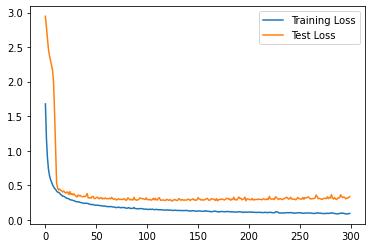

In [24]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

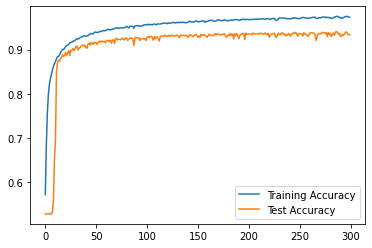

In [25]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 7s 3ms/step - loss: 0.3344 - accuracy: 0.9329


##  4.3 Make Predictions

In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([[9.9875736e-01, 8.4925195e-10, 4.6798087e-07, ..., 1.3406317e-07,
        4.6834384e-07, 3.0169909e-07],
       [5.8569482e-14, 5.7415215e-09, 1.8645388e-10, ..., 4.8435869e-09,
        4.5505043e-08, 5.9628411e-07],
       [8.7432164e-01, 7.9969509e-04, 5.4046488e-04, ..., 3.9412608e-08,
        3.7475536e-07, 3.0587980e-11],
       ...,
       [3.2247972e-06, 3.9425330e-10, 2.1360877e-12, ..., 1.6188505e-08,
        4.9881891e-08, 3.7787277e-07],
       [9.6493894e-01, 3.5509563e-03, 2.6122790e-02, ..., 6.6702512e-07,
        2.3876087e-06, 5.1484044e-08],
       [2.3166494e-07, 1.6962098e-11, 1.0858498e-07, ..., 4.0673681e-10,
        1.9530974e-10, 1.2601041e-07]], dtype=float32)